In [23]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
%matplotlib inline

In [24]:
import pandas as pd
import numpy as np

In [25]:
data = load_iris()
datapd = pd.DataFrame(data.data)
t = pd.DataFrame(data.target)

datapd = datapd.rename(columns=dict(zip(range(0,4), data.feature_names)))
index_to_name = dict(zip(range(0,4), data.target_names))
datapd['target_types'] = data.target
datapd['target_names'] = list(map(lambda x: index_to_name[x], datapd['target_types']))

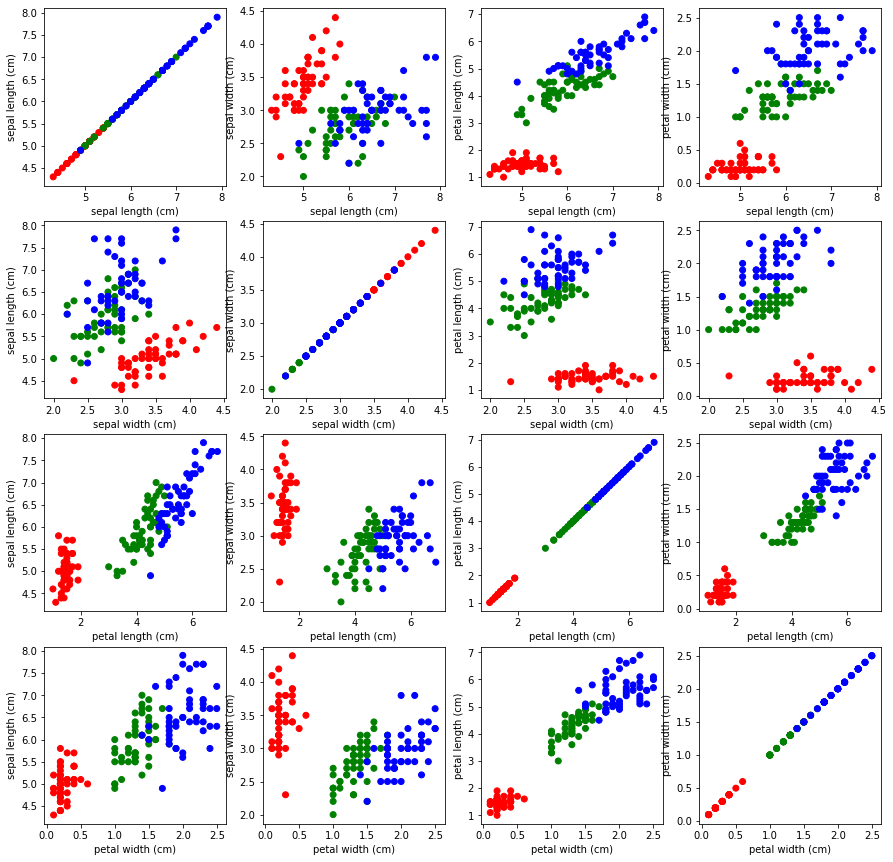

In [26]:
import itertools
datapd.iloc[:, :5]  # select datas by indexes
combinations = list(itertools.product(range(0,4), repeat=2))
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
for i, ax in enumerate(axes.flat):
    ax.scatter(datapd.iloc[:, combinations[i][0]], datapd.iloc[:, combinations[i][1]], color=list(map(lambda x: "rgb"[x], datapd['target_types'])))
    
    ax.set_xlabel(datapd.columns[combinations[i][0]])
    ax.set_ylabel(datapd.columns[combinations[i][1]])
fig.savefig("iris_diagrams.png", dpi=150)

In [126]:
# len(list(itertools.product(range(0,5), repeat=3)))    # output 125
class Classification:

    def __init__(self, inps=4, mids=4, outs=3):
        self.inp = torch.nn.Linear(inps, mids)
        self.mid = torch.nn.Linear(mids, outs)
        self.optimizer = torch.optim.Adamax(list(self.inp.parameters()) + list(self.mid.parameters()), lr=0.017)

    def forward(self, x):
        w = F.relu(self.inp(x))
        w = F.sigmoid(self.mid(w))
        return w

    def predict(self, x):
        return self.forward(x)

    def get_res(self, y):
        return torch.argmax(y, dim=1)

    def train(self, X_, Y_, epoches=10, batch_size=8):
        for e in range(epoches):

            for bs in range(0,X.shape[0], batch_size):
                self.optimizer.zero_grad()
                x = X_[bs:bs+batch_size]
                y = Y_[bs:bs+batch_size]

                # print(y)
                err = self.forward(x)
                loss = F.mse_loss(err, y)
                loss.backward()
                self.optimizer.step()

In [127]:
lin = torch.nn.Linear(2,6)
list(lin.parameters())[0]
a = [1,2,3]
b= [6,7,8]
a + b

[1, 2, 3, 6, 7, 8]

In [139]:
md = Classification(mids=8)
X = torch.tensor(np.array(datapd.iloc[:,:4]), requires_grad=True, dtype=torch.float32)
# Y = torch.tensor(np.array(datapd.iloc[:,4]))
con = {0: [1,0,0], 1:[0,1,0], 2: [0,0,1]}
K = np.array(list(map(lambda x: np.array(con[x],dtype=np.float32),datapd.iloc[:,4])))
Y = torch.tensor(K, requires_grad=True, dtype=torch.float32)
md.train(X,Y, batch_size=5, epoches=20)


In [140]:
A = torch.argmax(md.predict(X), dim=1)
As = np.array(list(map(lambda x: 1 if x else 0, np.array(np.array(A) == datapd.iloc[:,4]))))
acur = As.sum()/As.size
print(acur)

0.9333333333333333
